<a href="https://colab.research.google.com/github/danielgrgurevic/Desafios_Bootcamp_DL/blob/main/Desaf%C3%ADo_Introducci%C3%B3n_al_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Parte I

 ## 1. ¿Cuál es la diferencia entre el aprendizaje supervisado y el aprendizaje no supervisado?


En el aprendizaje supervisado, el modelo es entrenado con un conjunto de datos etiquetados, lo que significa que los datos de entrada están asociados con una salida conocida. El objetivo es aprender una relación entre las entradas y las salidas para hacer predicciones sobre nuevos datos.
Por otro lado en el aprendizaje no supervisado, el modelo trabaja con datos que no tienen etiquetas o salidas conocidas. El objetivo es identificar patrones o estructuras ocultas en los datos, como agrupamientos o relaciones entre variables.

 ## 2. En la industria de la salud, a menudo se utiliza el machine learning para predecir la probabilidad de enfermedades o condiciones médicas en función de diferentes variables de entrada, como síntomas, antecedentes médicos y factores de estilo de vida. Imagina que tienes un conjunto de datos que contiene información de pacientes y su diagnóstico (enfermo/no enfermo). ¿Qué tipo de aprendizaje utilizarías para construir un modelo predictivo?

 Para predecir la probabilidad de enfermedades o condiciones médicas utilizando un conjunto de datos con información de pacientes y su diagnóstico (enfermo/no enfermo), utilizaría aprendizaje supervisado. Este enfoque permite entrenar un modelo de clasificación para que aprenda a predecir el diagnóstico (enfermo/no enfermo) en función de las variables de entrada.

 ## 3. ¿Por qué razón es necesario dividir el set de datos en 2 set de datos al momento de realizar algún modelamiento supervisado? ¿Cuáles son los 2 set de datos y cúal es la función de cada uno?

Dividir el conjunto de datos en dos conjuntos es esencial para evaluar el rendimiento del modelo y evitar sobreajuste. Los dos conjuntos son:

Conjunto de entrenamiento: Se utiliza para entrenar el modelo, es decir, para que el algoritmo aprenda los patrones en los datos.

Conjunto de prueba (test): Se usa para evaluar el rendimiento del modelo después de haber sido entrenado, proporcionando una métrica de cómo funcionaría el modelo en datos no vistos.

 ## 4. ¿Cuál es la principal diferencia en el modelamiento de la regresión lineal para un enfoque estadístico y un enfoque de aprendizaje de máquinas?

En el enfoque estadístico, la regresión lineal se utiliza para inferir relaciones entre variables y estimar parámetros con base en ciertos supuestos, como normalidad de los errores y linealidad.

En el aprendizaje automático, la regresión lineal se utiliza principalmente para hacer predicciones, y se centra más en la capacidad predictiva del modelo, a menudo sin suposiciones estrictas sobre la distribución de los datos. Además, el machine learning puede involucrar técnicas adicionales, como regularización, para mejorar el rendimiento

## 5. Escoge una industria de acuerdo a su área de interés, rubro de trabajo o área de estudios (por ejemplo, salud, telecomunicaciones, retail, medioambiente, etc).

Aprendizaje supervisado (Clasificación): Predecir si el agua tratada cumple con los estándares de calidad (apta/no apta) en función de variables como la turbidez (NTU), pH, y concentraciones de contaminantes.

Aprendizaje supervisado (Regresión): Predecir el caudal de agua tratada en función de variables como la demanda diaria, la capacidad de las plantas de tratamiento y los niveles de agua cruda disponible. Esto ayudaría a optimizar el uso de recursos y prever la capacidad de tratamiento necesaria en distintos escenarios.

Aprendizaje no supervisado (Clustering): Agrupar diferentes fuentes de agua (ríos, pozos, embalses) según patrones similares de calidad del agua, como niveles de turbidez, pH y otros contaminantes.

Aprendizaje no supervisado (Reducción de dimensionalidad): Reducir el número de variables monitorizadas en el tratamiento de aguas (como múltiples parámetros de calidad) para optimizar el análisis y gestión de datos, enfocándose en los indicadores más críticos.

 ## Parte II
 En este ejemplo, utilizaremos Python y la biblioteca Scikit-learn para construir y entrenar
 nuestro modelo de regresión lineal. A continuación, se presenta un paso a paso para llevar a
 cabo este desafío:
 6. Carga los datos de la base data_housing.csv e importa las librerías necesarias para
 cargar los datos en un DataFrame, manipularlos, hacer cálculos, analizarlos y
 construir modelos de regresión lineal. Utiliza Pandas, NumPy y Scikit-learn.
 7. Genera un informe de calidad de datos de la base. Analiza la existencia de datos
 atípicos, extraños o nulos. Además, analiza las posibles correlaciones entre las
 variables.
 8. Genera un modelo de regresión lineal. Para ello:
 a. Importa el estimador de regresión lineal de Scikit-learn.
 b. Divide los datos (80% train y 20% test)
 c. Crea unainstancia del modelo de regresión lineal.
 d. Ajusta el modelo utilizando los datos de entrenamiento.
 9. Evalúa el modelo. Para ello:
 a. Utiliza los datos de entrenamiento y calcula métricas de evaluación, como el
 error cuadrado medio (MSE) o el coeficiente de determinación (R^2). Grafica
 los coeficientes.
 b. Utiliza los datos de prueba para realizar predicciones con el modelo
 entrenado, y evalúa el rendimiento del modelo comparando las predicciones
 con los valores reales

In [2]:
# Importar las librerías necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos
data = pd.read_excel('/content/drive/MyDrive/Data science/Desafío Latam/5 - Machine Learning /data-housing.xlsx')

# Visualizar las primeras filas del DataFrame
data.head()


,price,area,bedrooms,bathrooms,stories,guestroom,hotwaterheating,airconditioning,parking
0,13300000,7420,4,2,3,no,no,yes,2
1,12250000,8960,4,4,4,no,no,yes,3
2,12250000,9960,3,2,2,no,no,no,2
3,12215000,7500,4,2,2,no,no,yes,3
4,11410000,7420,4,1,2,yes,no,yes,2


In [7]:
# Informe de calidad de datos

# Resumen de los datos
data.info()

# Buscar valores nulos
null_values = data.isnull().sum()
print("Valores nulos en cada columna:\n", null_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            545 non-null    int64
 1   area             545 non-null    int64
 2   bedrooms         545 non-null    int64
 3   bathrooms        545 non-null    int64
 4   stories          545 non-null    int64
 5   guestroom        545 non-null    int64
 6   hotwaterheating  545 non-null    int64
 7   airconditioning  545 non-null    int64
 8   parking          545 non-null    int64
dtypes: int64(9)
memory usage: 38.4 KB
Valores nulos en cada columna:
 price              0
area               0
bedrooms           0
bathrooms          0
stories            0
guestroom          0
hotwaterheating    0
airconditioning    0
parking            0
dtype: int64


In [5]:
# Reemplazar 'yes' por 1 y 'no' por 0 en las columnas categóricas
data.replace({'yes': 1, 'no': 0}, inplace=True)

# Verificar los primeros valores después de la conversión
data.head()

,price,area,bedrooms,bathrooms,stories,guestroom,hotwaterheating,airconditioning,parking
0,13300000,7420,4,2,3,0,0,1,2
1,12250000,8960,4,4,4,0,0,1,3
2,12250000,9960,3,2,2,0,0,0,2
3,12215000,7500,4,2,2,0,0,1,3
4,11410000,7420,4,1,2,1,0,1,2


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            545 non-null    int64
 1   area             545 non-null    int64
 2   bedrooms         545 non-null    int64
 3   bathrooms        545 non-null    int64
 4   stories          545 non-null    int64
 5   guestroom        545 non-null    int64
 6   hotwaterheating  545 non-null    int64
 7   airconditioning  545 non-null    int64
 8   parking          545 non-null    int64
dtypes: int64(9)
memory usage: 38.4 KB


In [9]:
# Descripción estadística para identificar datos atípicos
data.describe()

,price,area,bedrooms,bathrooms,stories,guestroom,hotwaterheating,airconditioning,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.177982,0.045872,0.315596,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.382849,0.209399,0.465180,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,3.000000


# Exploracion de datos

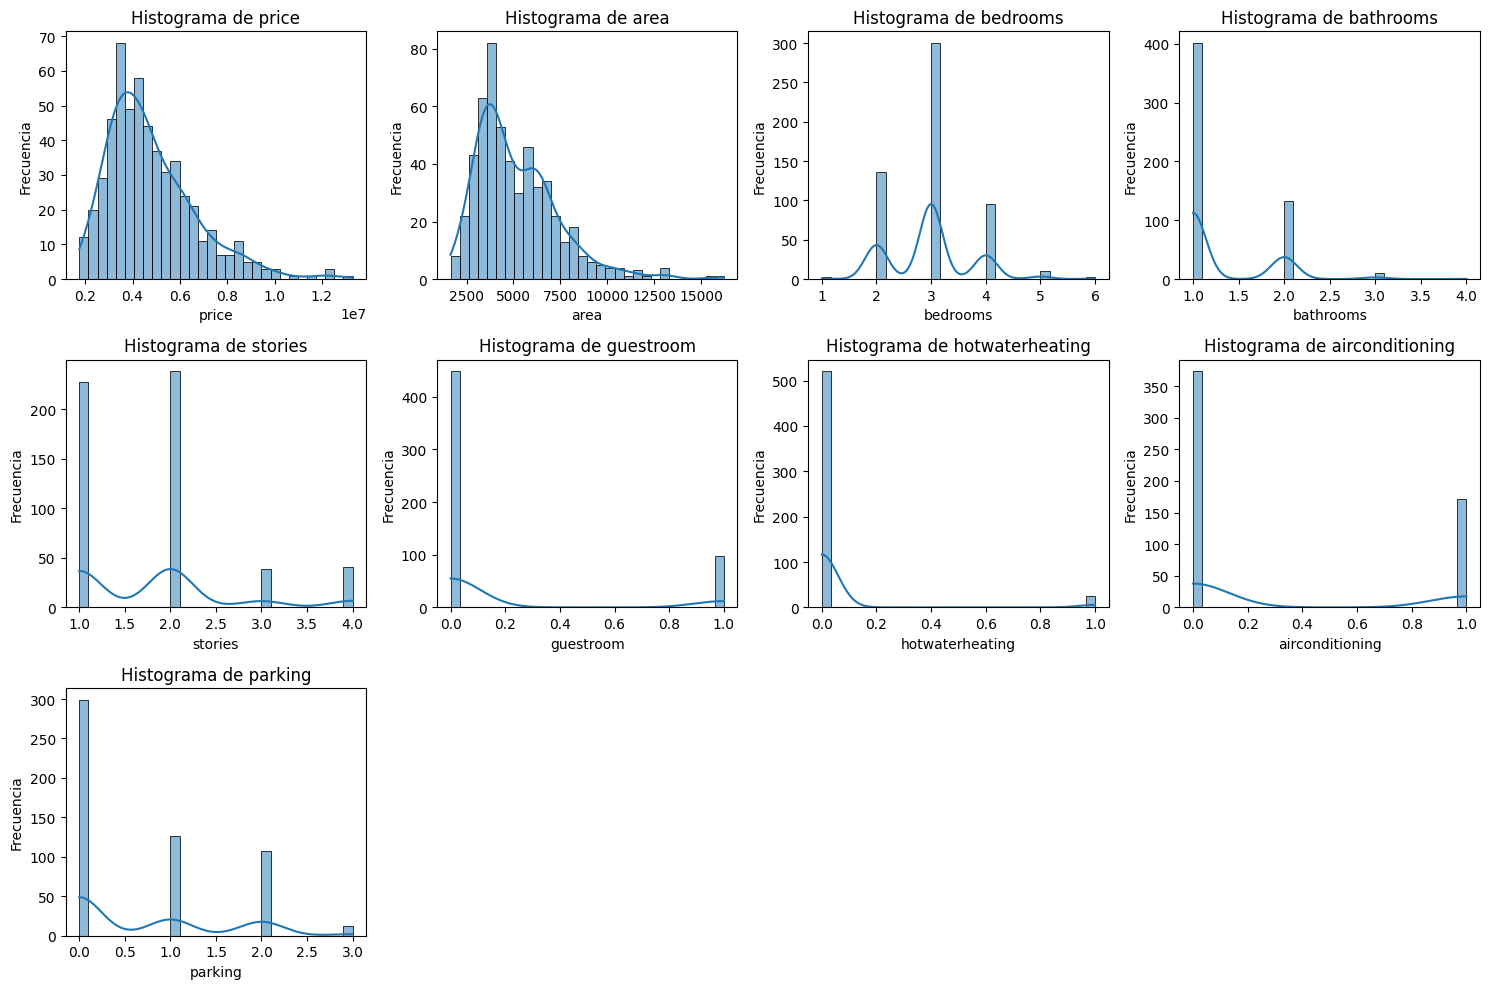

In [14]:
# Importar librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de la gráfica
plt.figure(figsize=(15, 10))

# Lista de variables para crear histogramas
variables = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'guestroom', 'hotwaterheating', 'airconditioning', 'parking']

# Crear histogramas para cada variable
for i, var in enumerate(variables, 1):
    plt.subplot(3, 4, i)  # 3 filas, 4 columnas, i-ésimo gráfico
    sns.histplot(data[var], kde=True, bins=30)
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()


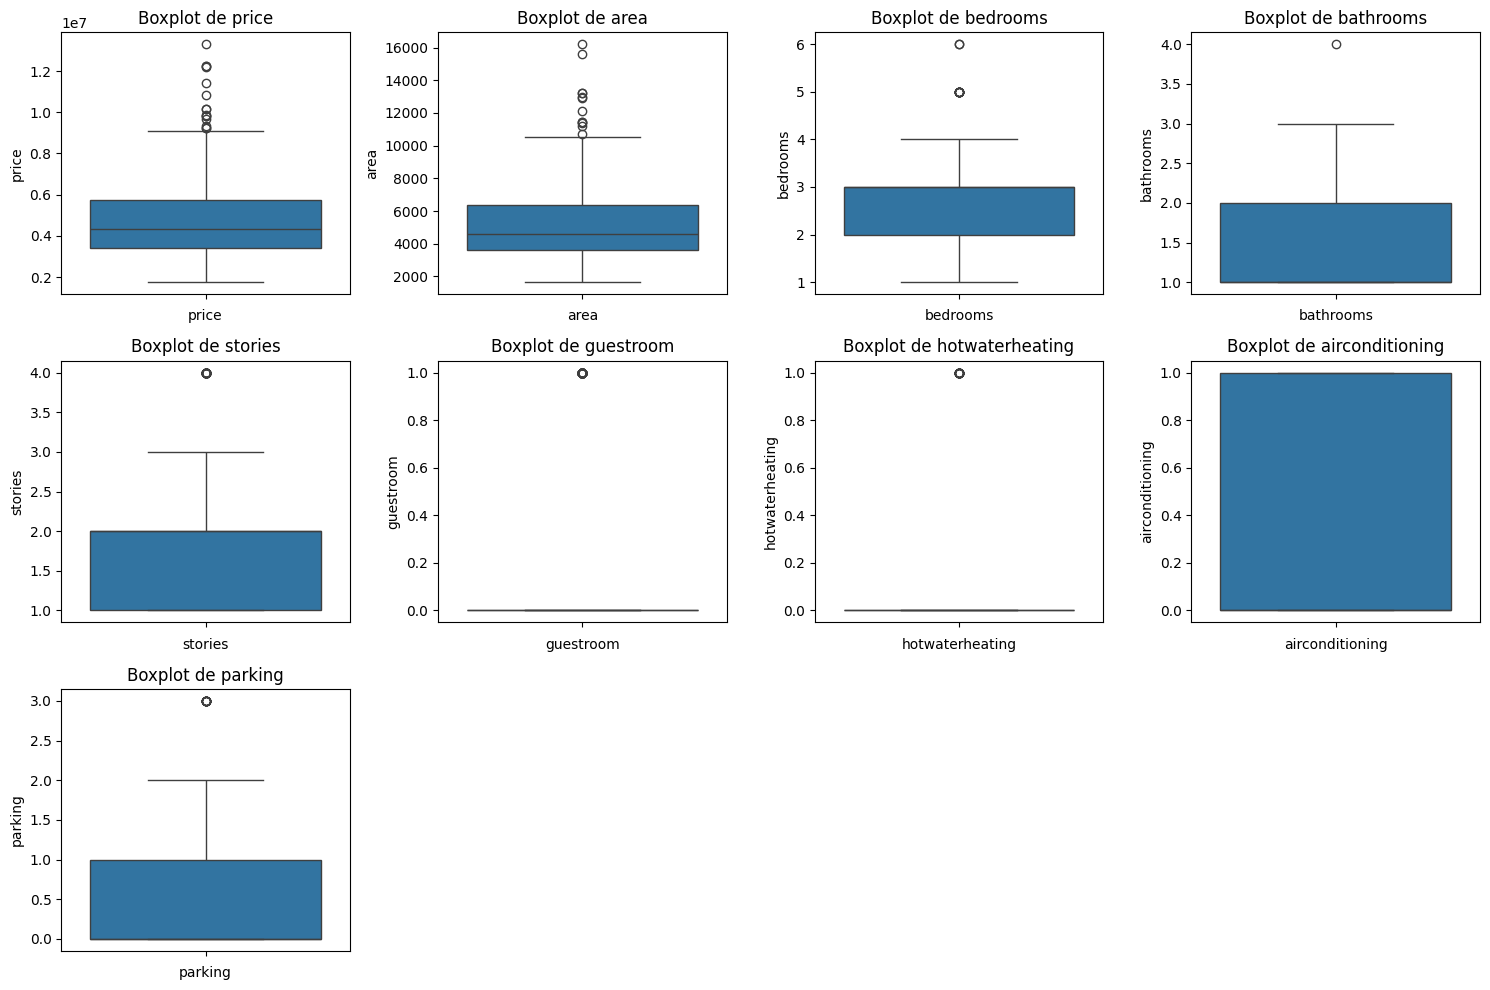

In [16]:
# Configuración de la gráfica
plt.figure(figsize=(15, 10))

# Crear boxplots para cada variable
for i, var in enumerate(variables, 1):
    plt.subplot(3, 4, i)  # 3 filas, 4 columnas, i-ésimo gráfico
    sns.boxplot(y=data[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel(var)

plt.tight_layout()
plt.show()

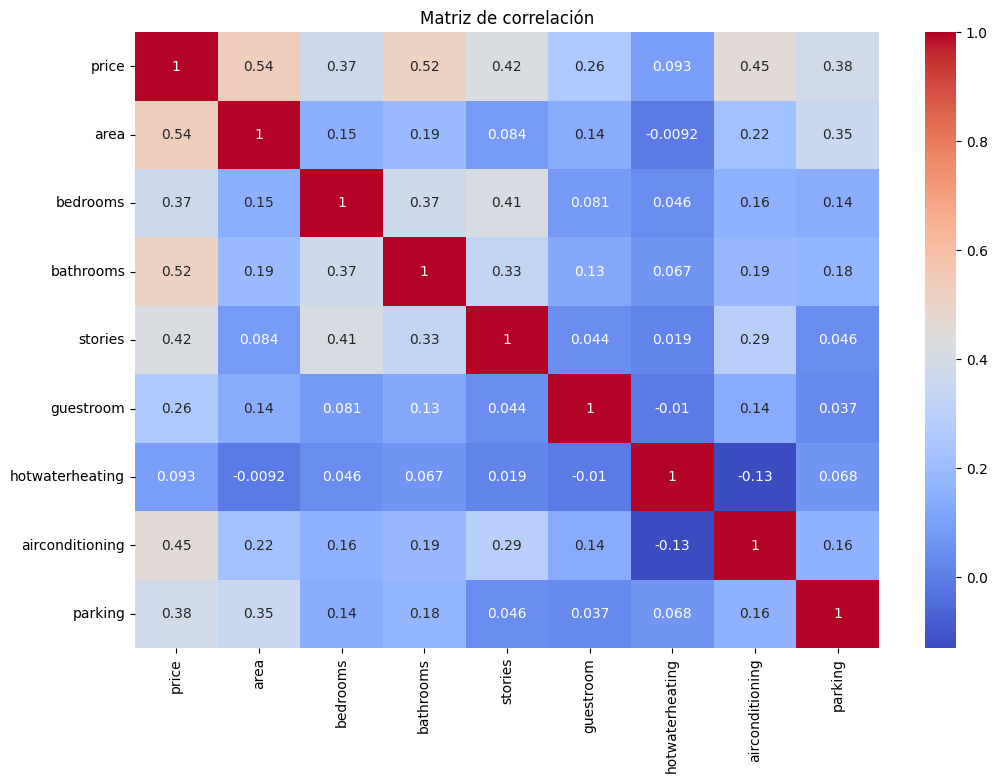

In [10]:
# Matriz de correlación
correlation_matrix = data.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de correlación")
plt.show()

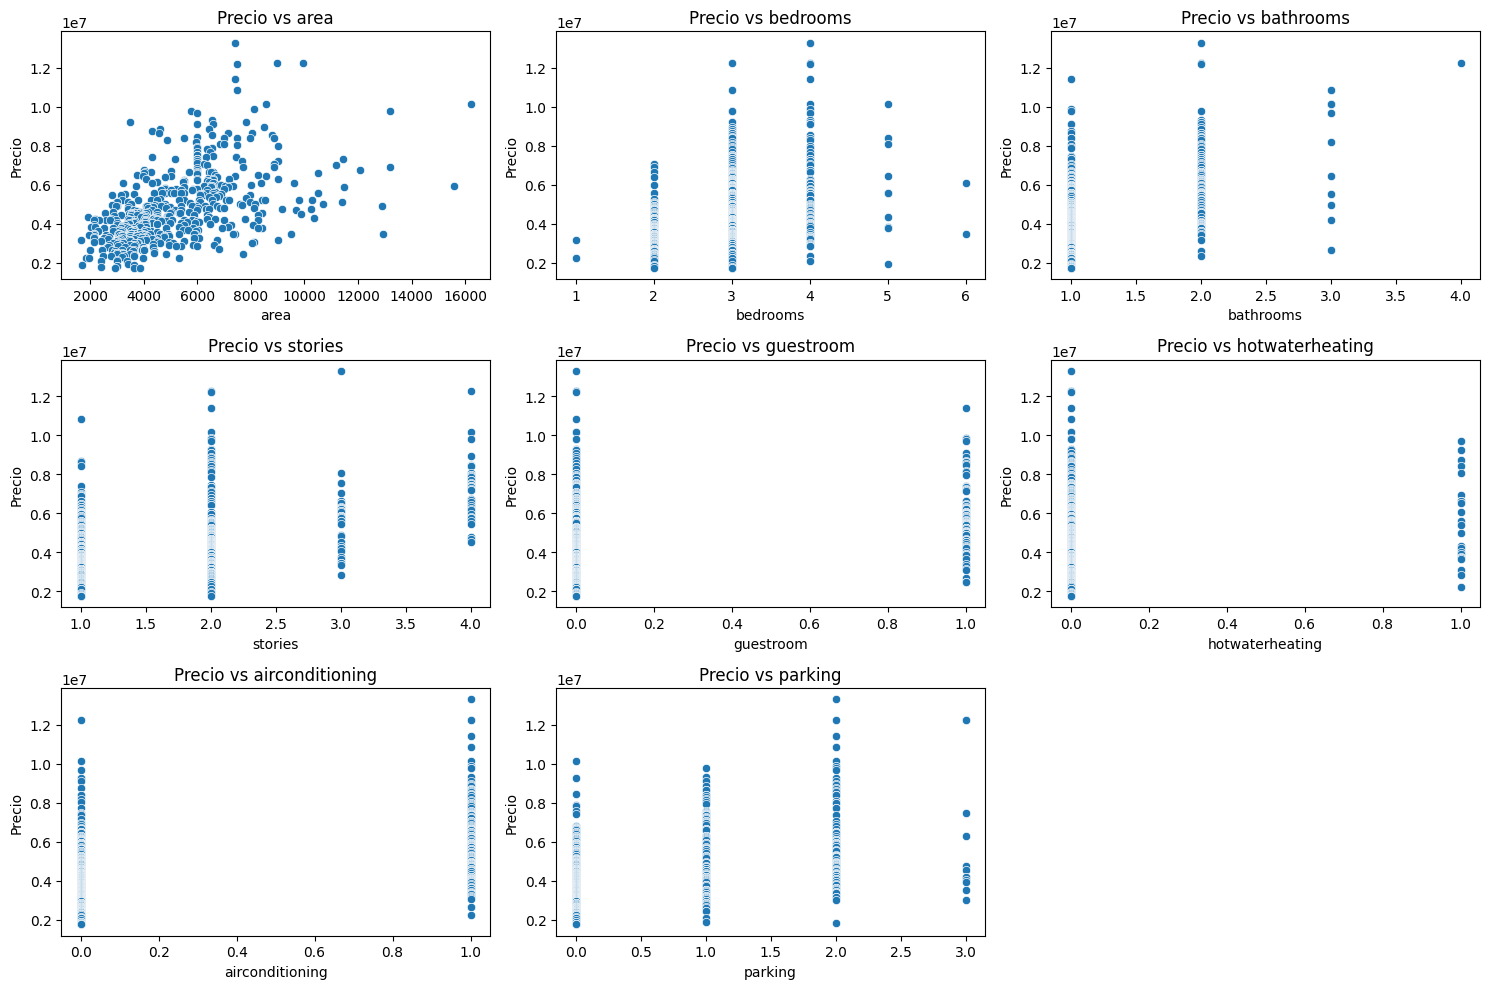

In [13]:
# Configuración de la gráfica
plt.figure(figsize=(15, 10))

# Lista de variables para comparar con el precio
variables = ['area', 'bedrooms', 'bathrooms', 'stories', 'guestroom', 'hotwaterheating', 'airconditioning', 'parking']

# Crear scatter plots para cada variable contra el precio
for i, var in enumerate(variables, 1):
    plt.subplot(3, 3, i)  # 3 filas, 3 columnas, i-ésimo gráfico
    sns.scatterplot(x=data[var], y=data['price'])
    plt.title(f'Precio vs {var}')
    plt.xlabel(var)
    plt.ylabel('Precio')

plt.tight_layout()
plt.show()



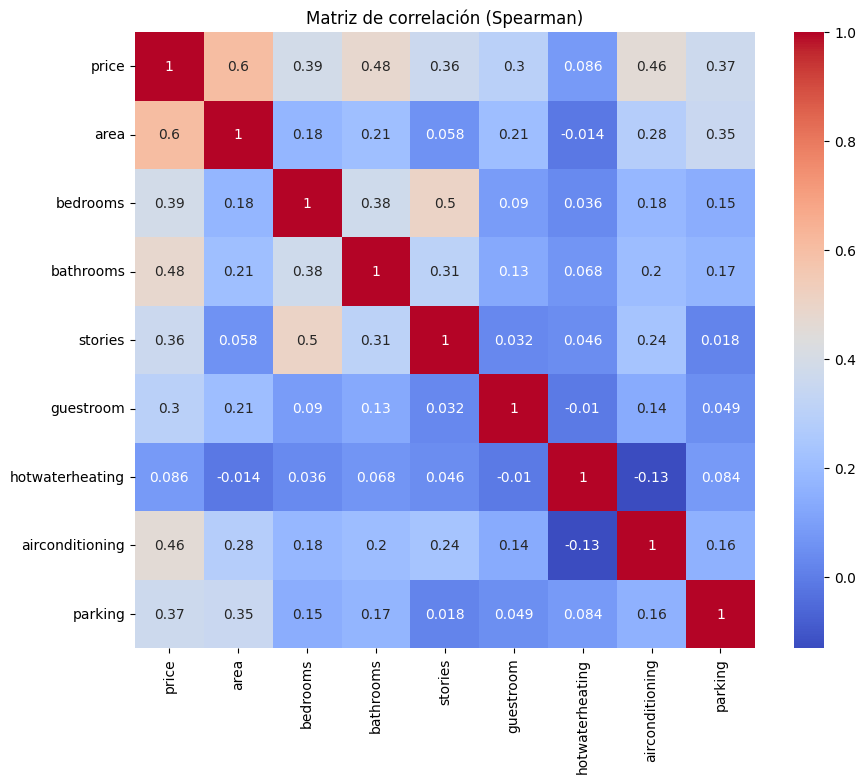

In [12]:
# Calcular la matriz de correlación de Spearman
spearman_corr = data.corr(method='spearman')

# Mapa de calor de la correlación de Spearman
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación (Spearman)')
plt.show()


# Entrenamiento de modelos

In [17]:
import pandas as pd

def remove_outliers_iqr(df, column):
    # Calcular el rango intercuartílico (IQR)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites para los valores no atípicos
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar el DataFrame para eliminar valores atípicos
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df_filtered

# Lista de variables para filtrar
variables = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'guestroom', 'hotwaterheating', 'airconditioning', 'parking']

# Aplicar la función a cada columna
for var in variables:
    data = remove_outliers_iqr(data, var)

# Mostrar el tamaño del DataFrame después de eliminar los valores atípicos
print(f"Tamaño del DataFrame después de eliminar atípicos: {data.shape}")


Tamaño del DataFrame después de eliminar atípicos: (236, 9)


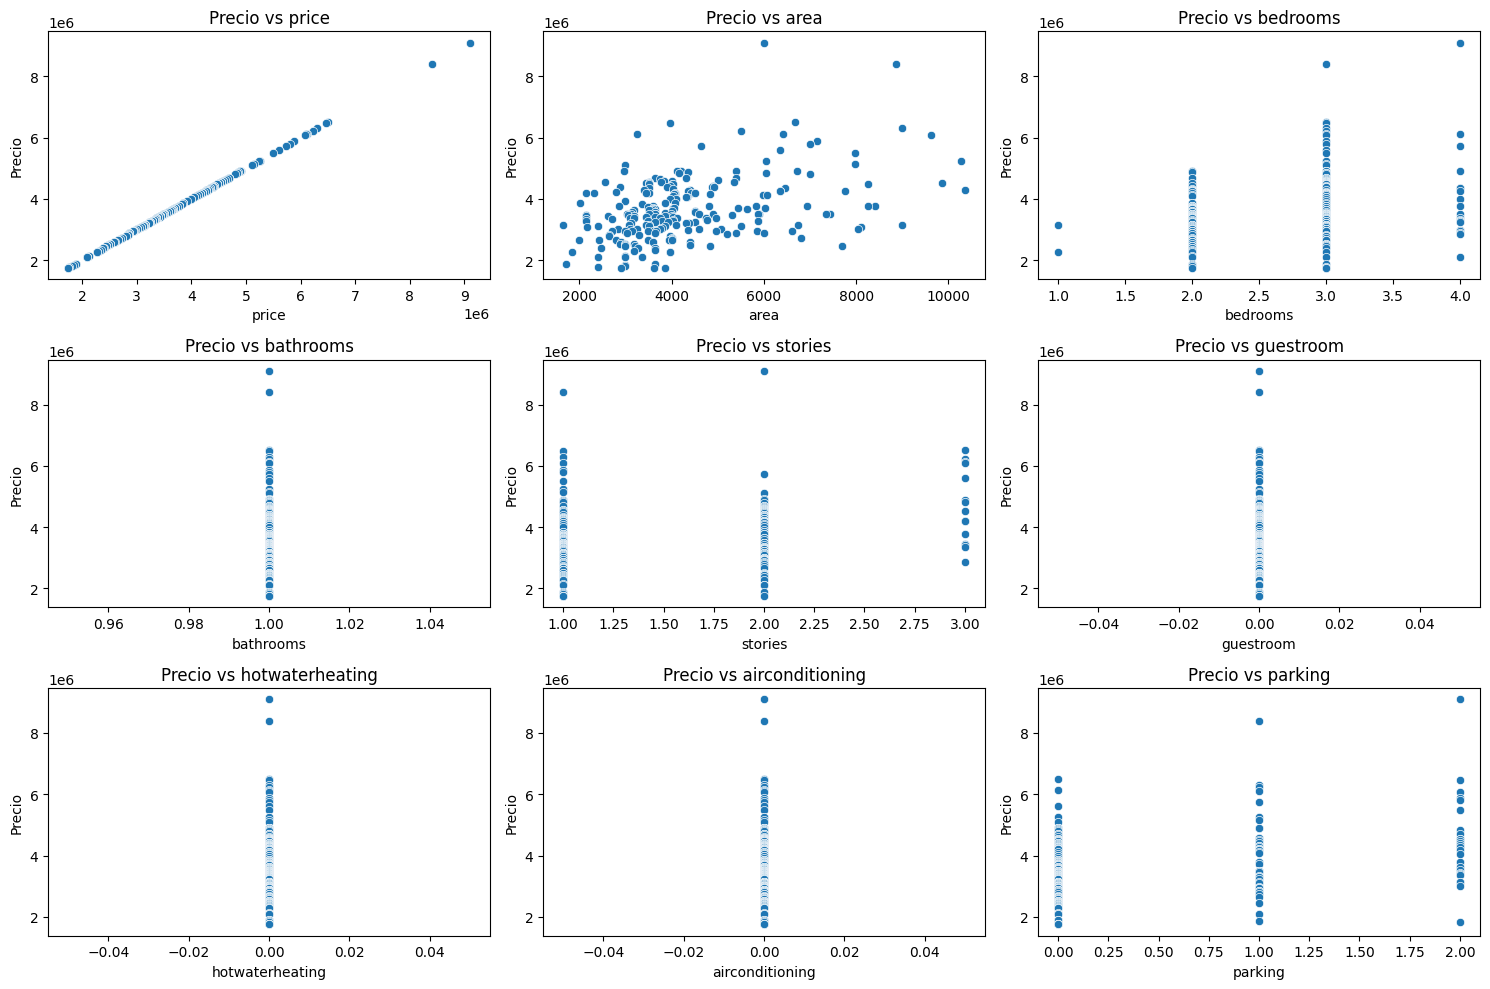

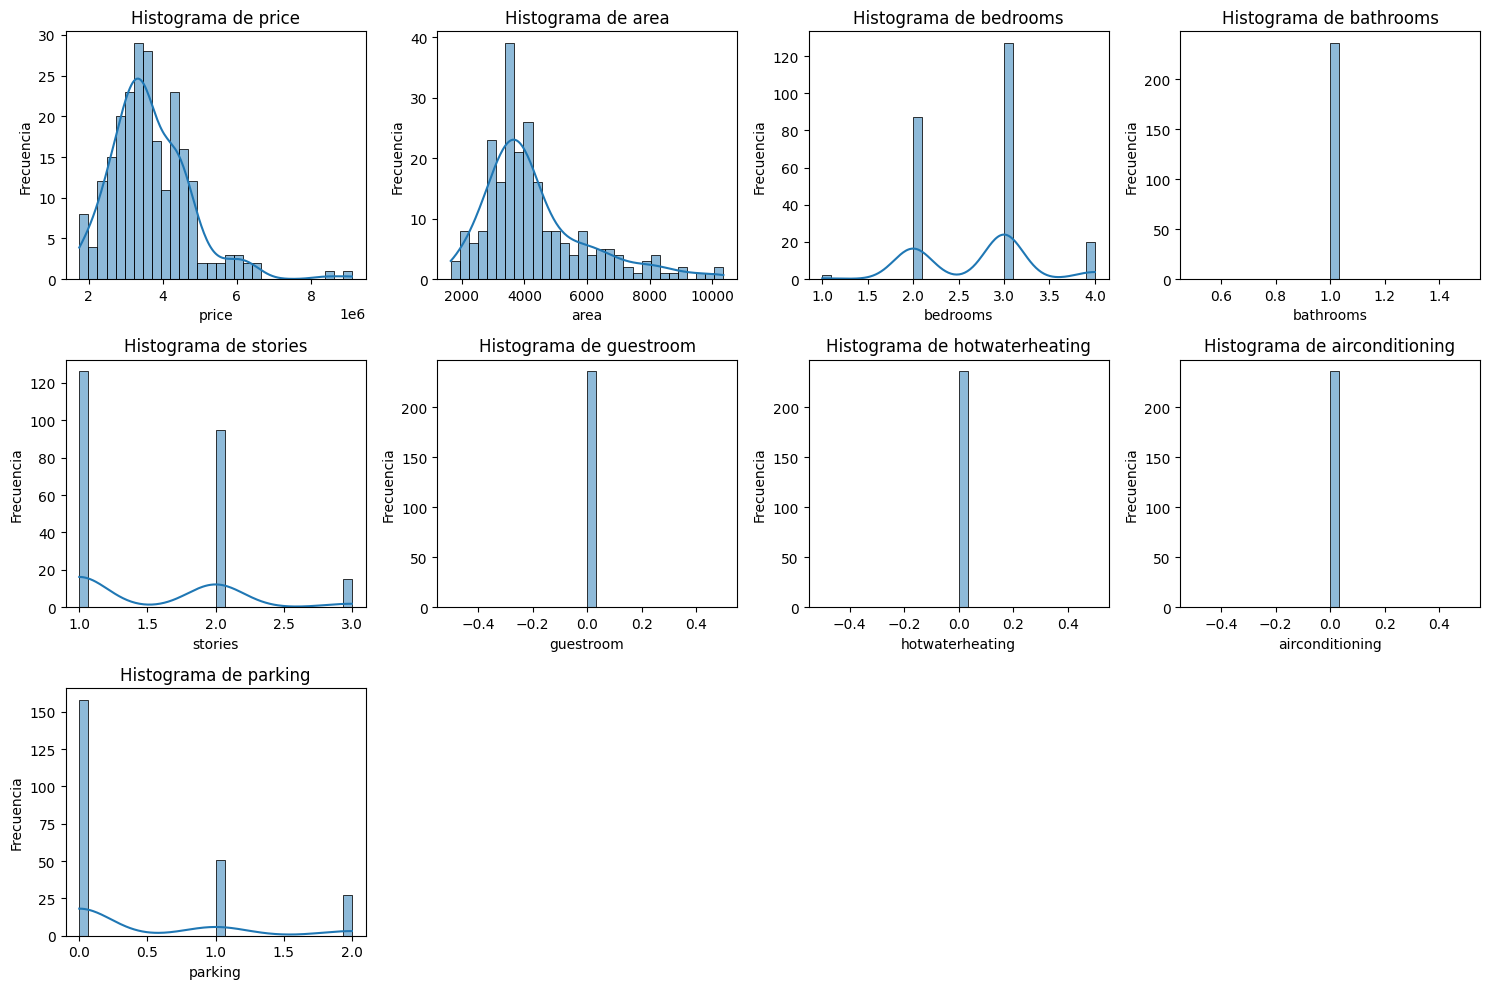

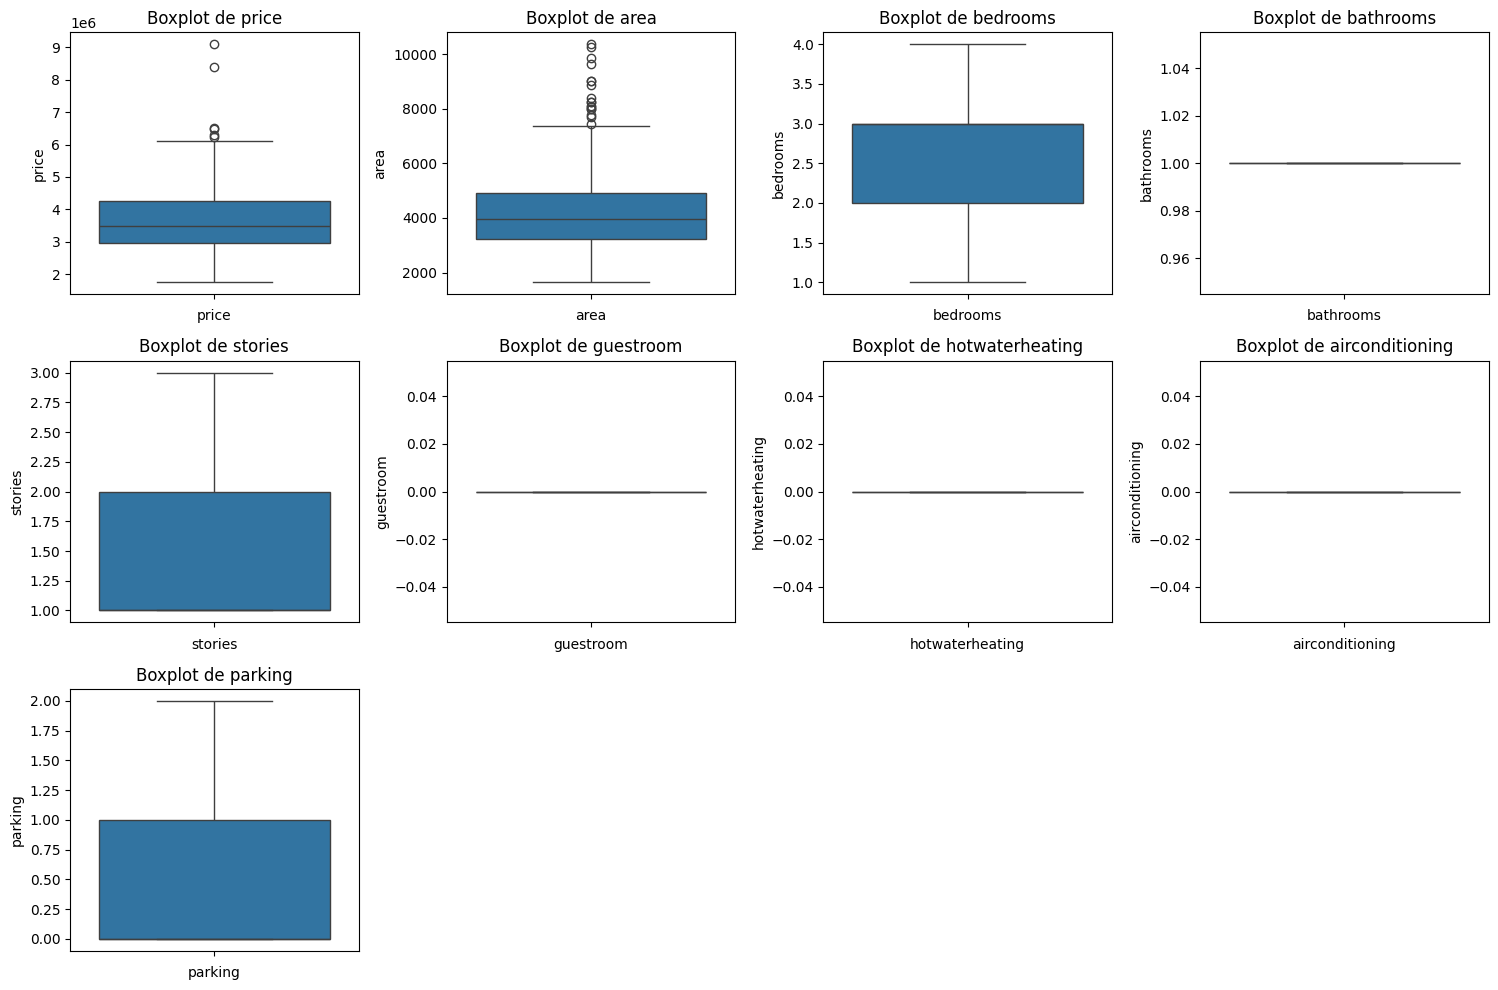

In [19]:
# Volver a crear scatter plots para las variables sin valores atípicos
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=data[var], y=data['price'])
    plt.title(f'Precio vs {var}')
    plt.xlabel(var)
    plt.ylabel('Precio')

plt.tight_layout()
plt.show()

# Volver a crear histogramas para las variables sin valores atípicos
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(3, 4, i)
    sns.histplot(data[var], kde=True, bins=30)
    plt.title(f'Histograma de {var}')
    plt.xlabel(var)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

# Volver a crear boxplots para las variables sin valores atípicos
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(y=data[var])
    plt.title(f'Boxplot de {var}')
    plt.xlabel(var)

plt.tight_layout()
plt.show()


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separar características y variable objetivo
X = data.drop('price', axis=1)
y = data['price']

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear el modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo
model.fit(X_train, y_train)

# Hacer predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R^2): {r2:.2f}")


Error cuadrático medio (MSE): 684669806568.21
Coeficiente de determinación (R^2): 0.30


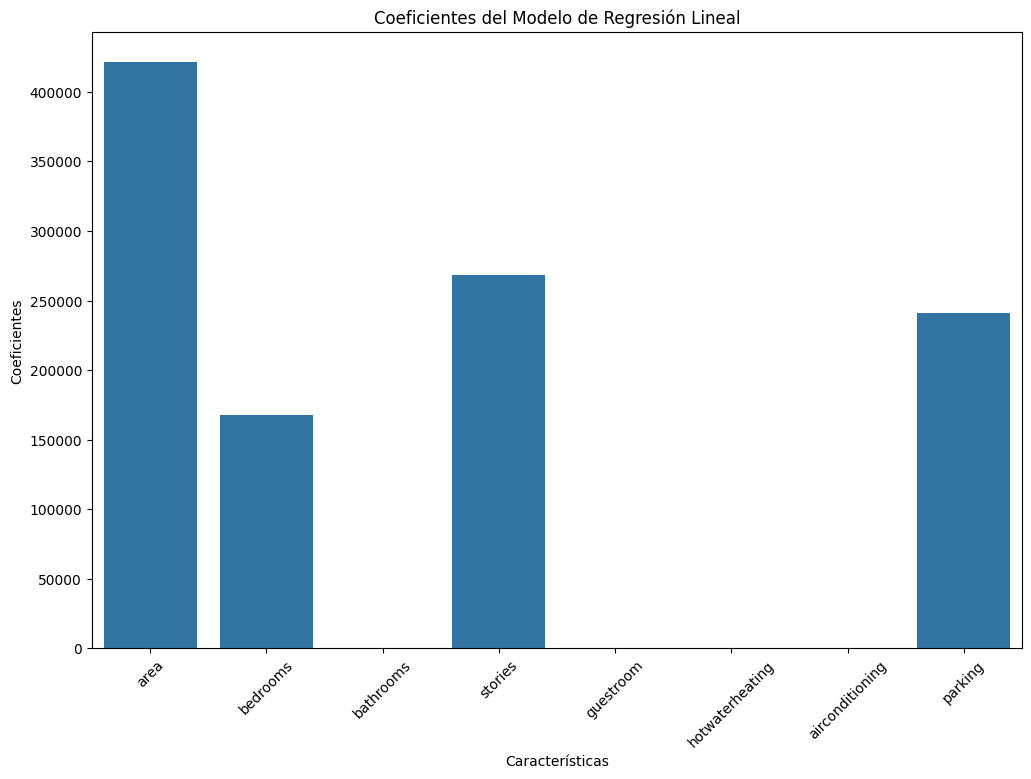

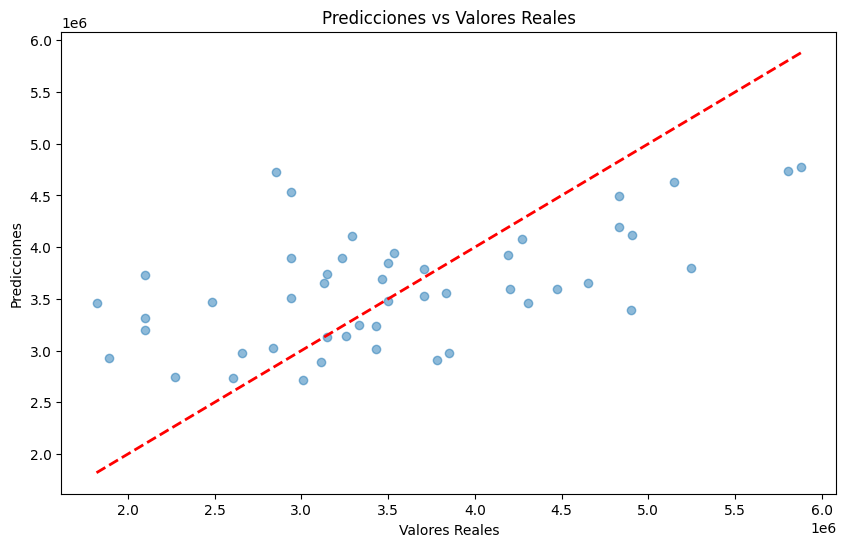

In [22]:
# Graficar los coeficientes del modelo
coefficients = model.coef_
features = X.columns

plt.figure(figsize=(12, 8))
sns.barplot(x=features, y=coefficients)
plt.title('Coeficientes del Modelo de Regresión Lineal')
plt.xlabel('Características')
plt.ylabel('Coeficientes')
plt.xticks(rotation=45)
plt.show()

# Graficar predicciones vs valores reales en el conjunto de prueba
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.show()
